# Covariance Comparison

In [69]:
import sacc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.io.fits as fits

In [62]:
txpipe = sacc.Sacc.load_fits('/global/cscratch1/sd/elp25/TXPipe/summary_statistics_real.sacc')

In [63]:
cov_txpipe = txpipe.covariance.covmat

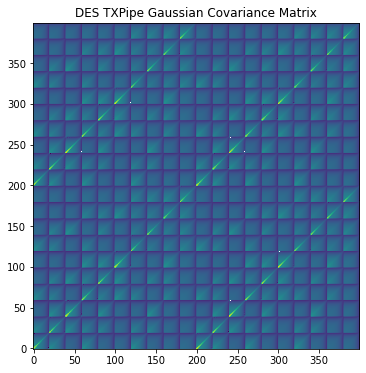

In [74]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6,6))
plt.imshow(cov_txpipe,norm=LogNorm(), origin='lower left')
plt.title('DES TXPipe Gaussian Covariance Matrix')
plt.show()

In [65]:
path = '/global/cscratch1/sd/elp25/txpipe-reanalysis/desy1/data/'

In [70]:
DES = fits.open(path + '2pt_NG_mcal_1110.fits')  # open a FITS file

In [71]:
cov_des = des_published_cov = DES['covmat'].data

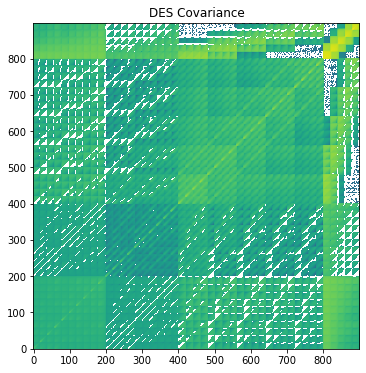

In [72]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(6,6))
plt.imshow(cov_des,norm=LogNorm(), origin='lower left')
plt.title('DES Covariance')
plt.show()

In [87]:
print(txpipe.get_tracer_combinations())
for i in range(10):
    print(DES['xip'].data['bin1'][i*20], DES['xip'].data['bin2'][i*20])

ids = np.arange(10)

Xibin1_txpipe = np.array([1,1,2,1,2,3,1,2,3,4])
Xibin2_txpipe = np.array([1,2,2,3,3,3,4,4,4,4])

Xibin1_cosmosis = np.array([1,1,1,1,2,2,2,3,3,4])
Xibin2_cosmosis = np.array([1,2,3,4,2,3,4,3,4,4])

ids2 = []
for i in range(10):
    mask = (Xibin1_txpipe == Xibin1_cosmosis[i]) * (Xibin2_txpipe == Xibin2_cosmosis[i])
    ids2.append(ids[mask][0])

print(ids2)

[('source_0', 'source_0'), ('source_1', 'source_0'), ('source_1', 'source_1'), ('source_2', 'source_0'), ('source_2', 'source_1'), ('source_2', 'source_2'), ('source_3', 'source_0'), ('source_3', 'source_1'), ('source_3', 'source_2'), ('source_3', 'source_3')]
1 1
1 2
1 3
1 4
2 2
2 3
2 4
3 3
3 4
4 4
[0, 1, 3, 6, 2, 4, 7, 5, 8, 9]


In [88]:
theta_txpipe, xi  = TXPipe.get_theta_xi('galaxy_shear_xi_plus', 'source_0', 'source_0')
theta_des = DES['wtheta'].data['ang'][0:20]

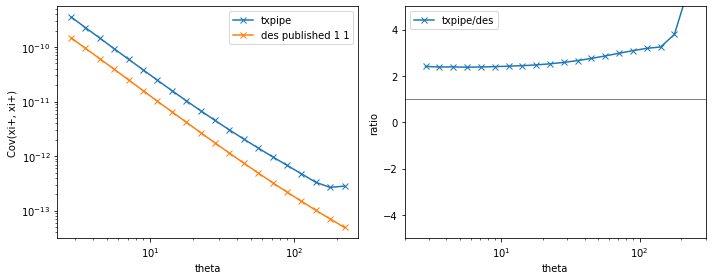

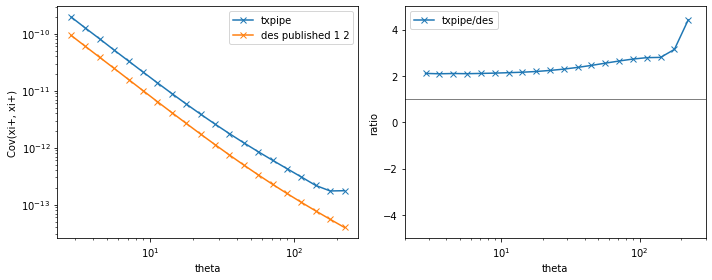

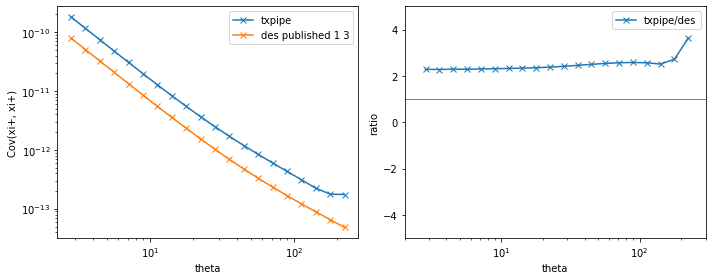

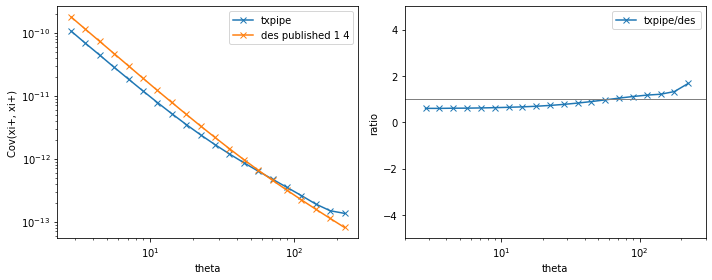

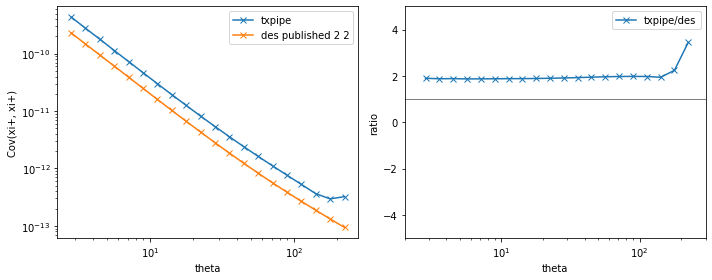

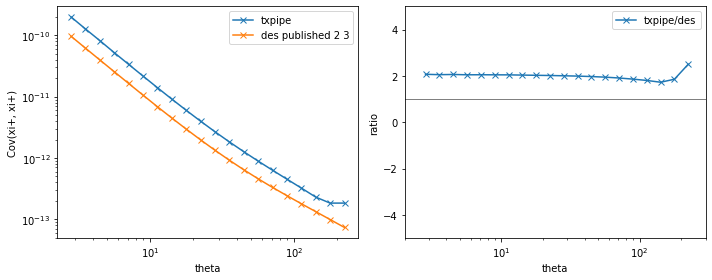

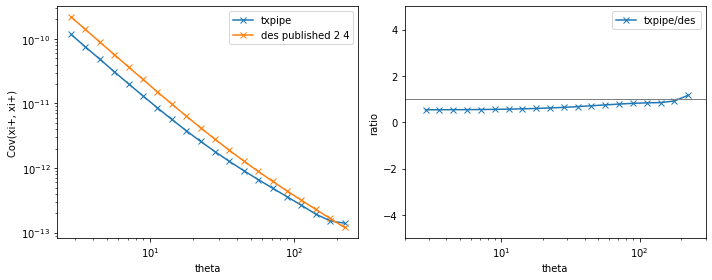

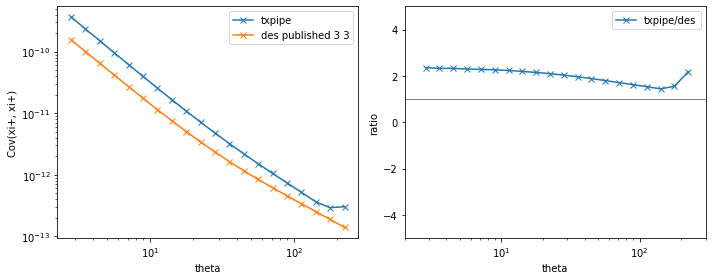

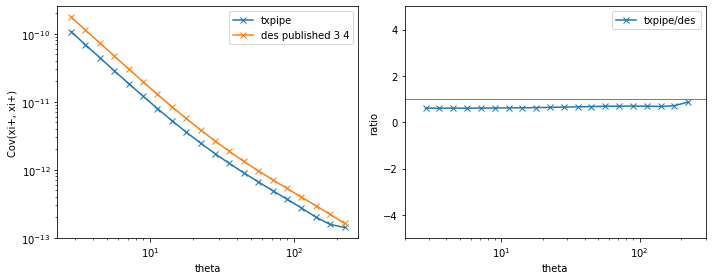

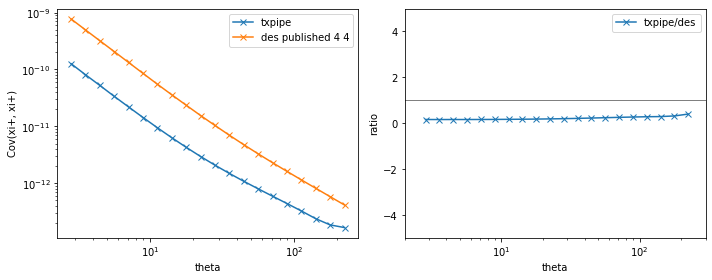

In [89]:
for i in range(10):
    plt.figure(figsize=(10,4))

    plt.subplot(121)
     #plt.loglog(theta_txpipe, np.diag(cov_txpipe[100+ids2[i]*20:120+ids2[i]*20,100+ids2[i]*20:120+ids2[i]*20]), marker='x', label='txpipe')
     #plt.loglog(theta_cosmosis, np.diag(cov_cosmosis[i*20:20+i*20,i*20:20+i*20]), marker='x', label='cosmosis')
    plt.loglog(theta_txpipe, np.diag(cov_txpipe[ids2[i]*20:20+ids2[i]*20,ids2[i]*20:20+ids2[i]*20]), marker='x', label='txpipe')
    plt.loglog(theta_des, np.diag(cov_des[i*20:20+i*20,i*20:20+i*20]), marker='x', label='des published '+str(Xibin1_cosmosis[i])+' '+str(Xibin2_cosmosis[i]))

    plt.xlabel('theta')
    plt.ylabel('Cov(xi+, xi+)')
    plt.legend()
    
    plt.subplot(122)
#     plt.semilogx(theta_txpipe, np.diag(cov_txpipe[100+ids2[i]*20:120+ids2[i]*20,100+ids2[i]*20:120+ids2[i]*20])/np.diag(cov_cosmosis[i*20:20+i*20,i*20:20+i*20]), marker='x', label='txpipe/cosmosis')
    plt.semilogx(theta_txpipe, np.diag(cov_txpipe[ids2[i]*20:20+ids2[i]*20,ids2[i]*20:20+ids2[i]*20])/np.diag(cov_des[i*20:20+i*20,i*20:20+i*20]), marker='x', label='txpipe/des')

    plt.xlabel('theta')
    plt.ylabel('ratio')
    plt.legend()
    plt.ylim(-5,5)
    plt.plot([2,300],[1,1], color='grey', lw=1)
    plt.xlim(2,300)
    plt.tight_layout()